In [1]:
import numpy as np
import pandas as pd

In [2]:
df_raw = np.load("datasets/ERA5/ERA5-Large/pretrain.npy")

In [5]:
df_raw.shape

(116880, 4920)

<AxesSubplot:>

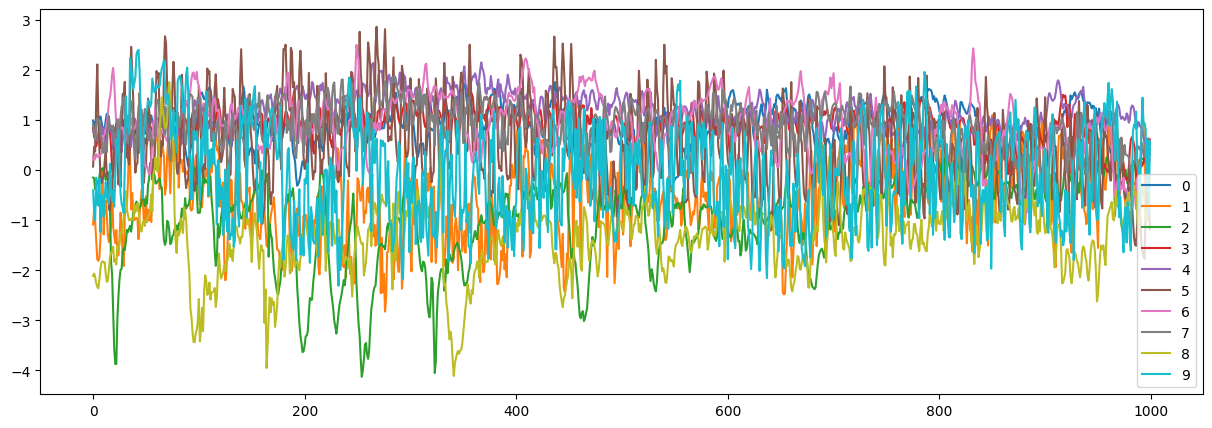

In [16]:
pd.DataFrame(df_raw[:1000,:10]).plot(figsize=(15,5))

In [ ]:
from scipy.stats import pearsonr

def compute_series_correlations(data, window_length):
    N, S = data.shape
    num_windows = S // window_length

    if num_windows < 1:
        raise ValueError("Not enough data to create at least one time window.")
    
    # Reshape into time windows of length T
    reshaped_data = data[:, :num_windows * window_length].reshape(N, num_windows, window_length)
    
    # Compute Pearson correlation for all series for each time window
    correlations = np.zeros((num_windows, N, N))
    for t in range(num_windows):
        for i in range(N):
            for j in range(N):
                if i != j:  # Avoid self-correlation if not needed
                    corr, _ = pearsonr(reshaped_data[i, t], reshaped_data[j, t])
                    correlations[t, i, j] = corr
                else:
                    correlations[t, i, j] = 1.0  # Self-correlation is 1
    
    return correlations


In [5]:
corr_test = compute_series_correlations(df_raw.T[:500,-20000:], 3200)

In [ ]:
corr_train = compute_series_correlations(df_raw.T[:500,20000:40000], 3200)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

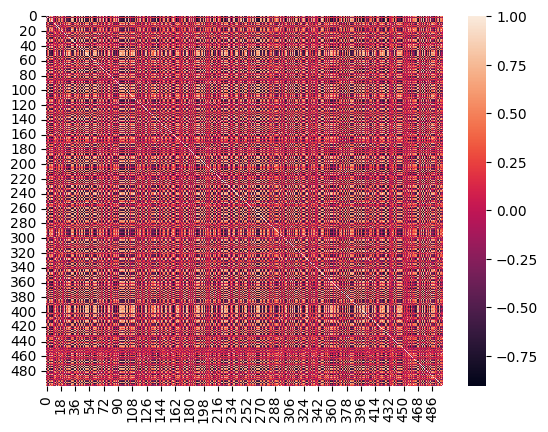

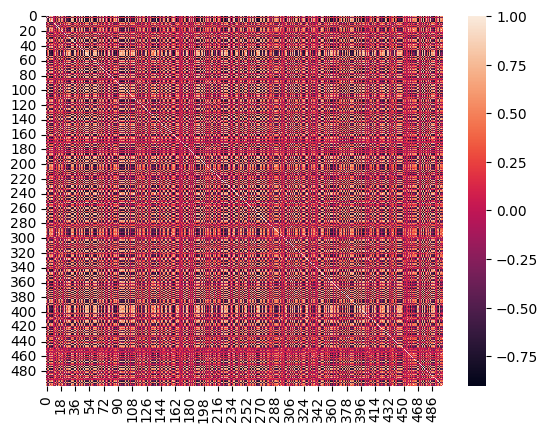

In [ ]:

sns.heatmap(corr_train[0])
plt.show()
sns.heatmap(corr_test[0])
plt.show()